<a href="https://colab.research.google.com/github/Tahiana07/ML-Vortex/blob/main/PartieC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Chargement : utiliser le fichier diabetes.csv fourni.

In [1]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "diabetes.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "saurabh00007/diabetescsv",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

/tmp/ipython-input-1-273294717.py:10: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


First 5 records:    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


2. Nettoyage et prétraitement : Gérez les zéros/missing dans les variables cliniques, standardisez ou normalisez
les mesures.

Gérez les zéros/missing dans les variables cliniques


In [2]:
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_with_zeros:
  df[col] = df[col].replace(0, df[col].mean())
print("Data", df)

Data      Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0              6    148.0           72.0      35.000000   79.799479  33.6   
1              1     85.0           66.0      29.000000   79.799479  26.6   
2              8    183.0           64.0      20.536458   79.799479  23.3   
3              1     89.0           66.0      23.000000   94.000000  28.1   
4              0    137.0           40.0      35.000000  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763           10    101.0           76.0      48.000000  180.000000  32.9   
764            2    122.0           70.0      27.000000   79.799479  36.8   
765            5    121.0           72.0      23.000000  112.000000  26.2   
766            1    126.0           60.0      20.536458   79.799479  30.1   
767            1     93.0           70.0      31.000000   79.799479  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       

Standardisation et normalisation sauf le colone cible

In [3]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

features = df.drop(columns=['Outcome'])

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

df_scaled = pd.DataFrame(scaled_features, columns=features.columns)
df_scaled['Outcome'] = df['Outcome']
# df_scaled

**3**. EDA et déséquilibre : Barplots du nombre de positifs/négatifs, statistiques descriptives par classe

barplot du nombre de negatif/negatif

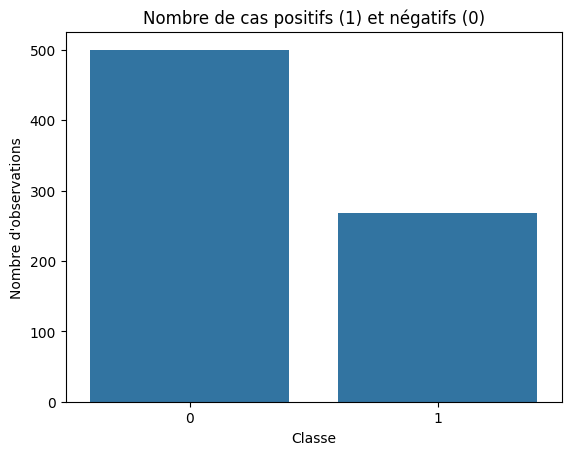

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df_scaled, x='Outcome')
plt.title("Nombre de cas positifs (1) et négatifs (0)")
plt.xlabel("Classe")
plt.ylabel("Nombre d'observations")
plt.show()

*Statistiques* descriptives par classe

In [5]:
print("Statistiques descriptives par classe (Valeur original):")
print(df.groupby('Outcome').describe())

Statistiques descriptives par classe (Valeur original):
        Pregnancies                                                Glucose  \
              count      mean       std  min   25%  50%  75%   max   count   
Outcome                                                                      
0             500.0  3.298000  3.017185  0.0  1.00  2.0  5.0  13.0   500.0   
1             268.0  4.865672  3.741239  0.0  1.75  4.0  8.0  17.0   268.0   

                     ... DiabetesPedigreeFunction           Age             \
               mean  ...                      75%    max  count       mean   
Outcome              ...                                                     
0        110.705367  ...                  0.56175  2.329  500.0  31.190000   
1        142.159661  ...                  0.72800  2.420  268.0  37.067164   

                                                  
               std   min   25%   50%   75%   max  
Outcome                                           
0        

In [6]:
grouped_stats = df_scaled.groupby('Outcome').describe()
print(grouped_stats)

        Pregnancies                                                    \
              count      mean       std       min       25%       50%   
Outcome                                                                 
0             500.0 -0.162456  0.896003 -1.141852 -0.844885 -0.547919   
1             268.0  0.303090  1.111023 -1.141852 -0.622160  0.046014   

                            Glucose            ... DiabetesPedigreeFunction  \
              75%       max   count      mean  ...                      75%   
Outcome                                        ...                            
0        0.342981  2.718712   500.0 -0.360868  ...                 0.271429   
1        1.233880  3.906578   268.0  0.673262  ...                 0.773524   

                     Age                                                    \
              max  count      mean       std       min       25%       50%   
Outcome                                                                      
0   

**Visualisation**

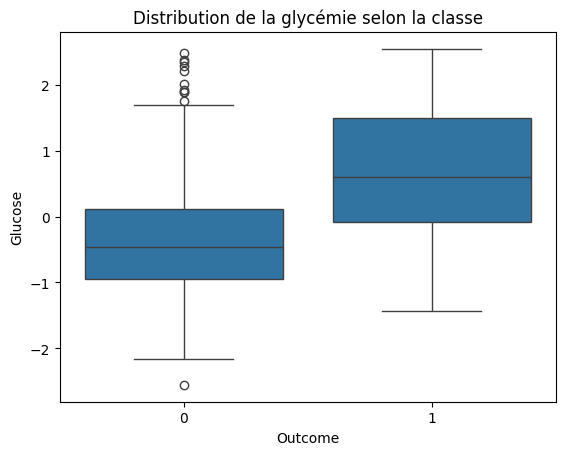

In [7]:
sns.boxplot(data=df_scaled, x='Outcome', y='Glucose')
plt.title("Distribution de la glycémie selon la classe")
plt.show()

4. Split train/validation/test : 60% train, 20% validation, 20% test. Le validation set sera utilisé pour choisir le
modèle approprié et le test set sera utilisé pour l’évaluation finale.

In [8]:
from sklearn.model_selection import train_test_split

X = df_scaled.drop('Outcome', axis=1)
y = df_scaled['Outcome']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)

print(f"Taille des donnees original: {len(df_scaled)}")
print(f"Taille des donnees d'entrainement: {len(X_train)} ({len(X_train)/len(df_scaled):.2%})")
print(f"Taille des donnees de validation: {len(X_val)} ({len(X_val)/len(df_scaled):.2%})")
print(f"Taille des donnees de test: {len(X_test)} ({len(X_test)/len(df_scaled):.2%})")

Taille des donnees original: 768
Taille des donnees d'entrainement: 460 (59.90%)
Taille des donnees de validation: 154 (20.05%)
Taille des donnees de test: 154 (20.05%)


5. Feature engineering / sélection : Encodage, normalisation/standardisation(deja fait), …

Feature selection: à partir de leur corrélation avec le variable cible

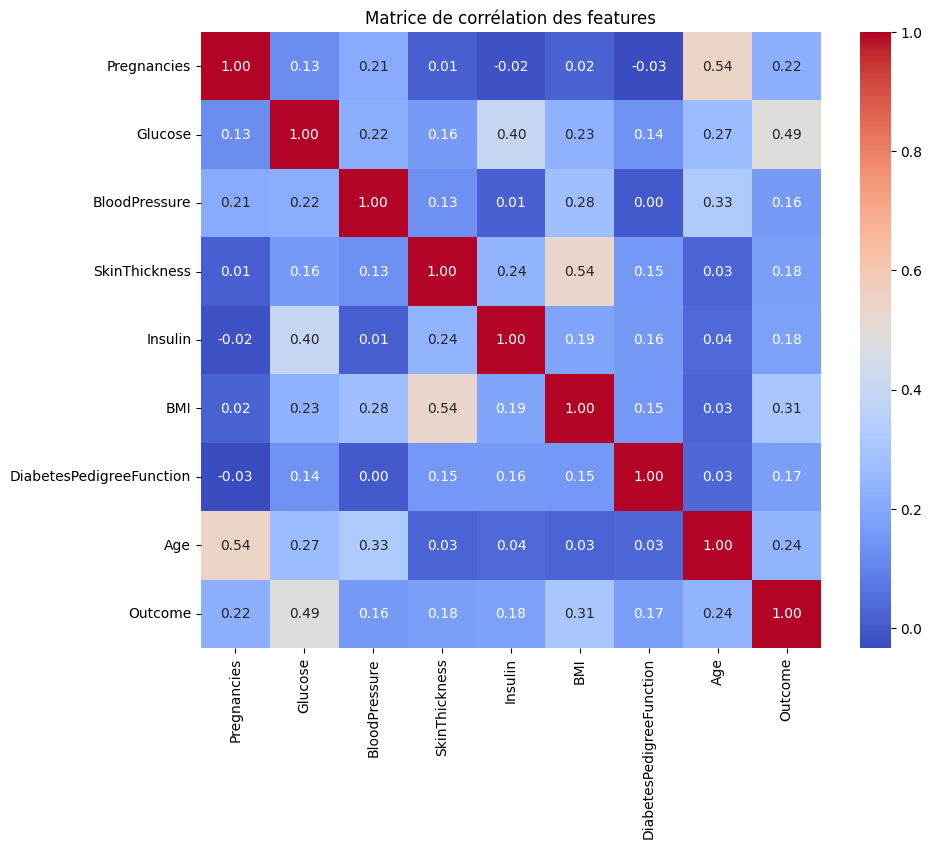

Features with high correlation (absolute value > 0.7): set()

Corrélation avec la variable cible ('Outcome'):
Outcome                     1.000000
Glucose                     0.492908
BMI                         0.312254
Age                         0.238356
Pregnancies                 0.221898
Insulin                     0.179185
SkinThickness               0.175026
DiabetesPedigreeFunction    0.173844
BloodPressure               0.162986
Name: Outcome, dtype: float64

Features selected based on correlation with Outcome (absolute value > 0.1): ['Glucose', 'BMI', 'Age', 'Pregnancies', 'Insulin', 'SkinThickness', 'DiabetesPedigreeFunction', 'BloodPressure']

Shape of feature sets after selection:
X_train_selected: (460, 8)
X_val_selected: (154, 8)
X_test_selected: (154, 8)


In [9]:
import matplotlib.pyplot as plt
correlation_matrix = df_scaled.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation des features")
plt.show()

high_corr_features = set()
for i in range(len(correlation_matrix.columns)):
  for j in range(i):
    if abs(correlation_matrix.iloc[i, j]) > 0.7:
      colname = correlation_matrix.columns[i]
      high_corr_features.add(colname)

print(f"Features with high correlation (absolute value > 0.7): {high_corr_features}")


correlation_with_outcome = correlation_matrix['Outcome'].sort_values(ascending=False)
print("\nCorrélation avec la variable cible ('Outcome'):")
print(correlation_with_outcome)

# selection des feature var
selected_features = correlation_with_outcome[abs(correlation_with_outcome) > 0.1].index.tolist()
if 'Outcome' in selected_features:
  selected_features.remove('Outcome')

print(f"\nFeatures selected based on correlation with Outcome (absolute value > 0.1): {selected_features}")

X_train_selected = X_train[selected_features]
X_val_selected = X_val[selected_features]
X_test_selected = X_test[selected_features]

print("\nShape of feature sets after selection:")
print(f"X_train_selected: {X_train_selected.shape}")
print(f"X_val_selected: {X_val_selected.shape}")
print(f"X_test_selected: {X_test_selected.shape}")



6. Gestion du déséquilibre

In [10]:
print("\nClass distribution in the training set:")
print(y_train.value_counts())

try:
  from imblearn.over_sampling import SMOTE
  print("\nApplying SMOTE for oversampling the minority class in the training set...")
  smote = SMOTE(random_state=42)
  X_train_resampled, y_train_resampled = smote.fit_resample(X_train_selected, y_train)

  print("Class distribution in the training set after SMOTE:")
  print(y_train_resampled.value_counts())
  print(f"Shape of resampled training data: {X_train_resampled.shape}")

  X_train_final = X_train_resampled
  y_train_final = y_train_resampled

except ImportError:
  print("\nImbalanced-learn library not found. Skipping SMOTE.")
  print("Please install it using: !pip install imblearn")
  X_train_final = X_train_selected
  y_train_final = y_train


Class distribution in the training set:
Outcome
0    300
1    160
Name: count, dtype: int64

Applying SMOTE for oversampling the minority class in the training set...
Class distribution in the training set after SMOTE:
Outcome
0    300
1    300
Name: count, dtype: int64
Shape of resampled training data: (600, 8)


7. Modélisation initiale : Logistic Regression. Evaluation Accuracy, Precision, Recall, F1 sur validation.


Evaluation initiale

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

modelLogisticRegretion = LogisticRegression(random_state=42)
modelLogisticRegretion.fit(X_train_final, y_train_final)

y_val_pred = modelLogisticRegretion.predict(X_val_selected)

accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

print("\n--- Logistic Regression Model Evaluation (Validation Set) ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")



--- Logistic Regression Model Evaluation (Validation Set) ---
Accuracy: 0.7403
Precision: 0.6207
Recall: 0.6667
F1 Score: 0.6429


8. Évaluation finale : Matrice de confusion, analyses sur le test set.


--- Logistic Regression Model Evaluation (Test Set) ---
Confusion Matrix:
[[75 25]
 [15 39]]


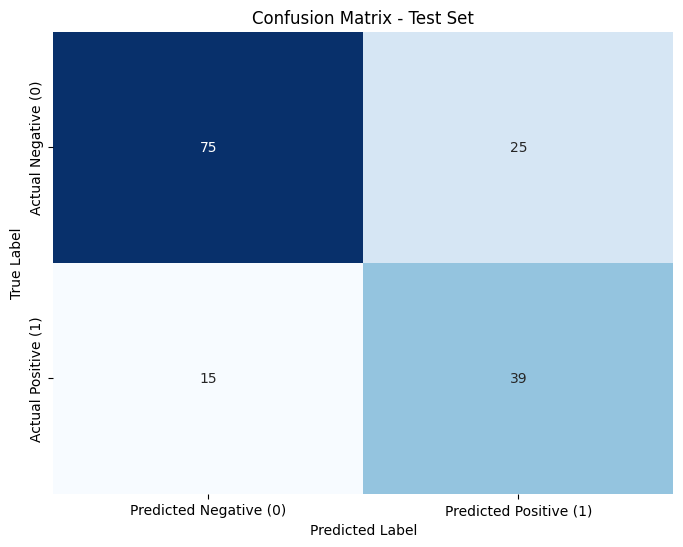

Accuracy (Test Set): 0.7403
Precision (Test Set): 0.6094
Recall (Test Set): 0.7222
F1 Score (Test Set): 0.6610

Breakdown from Confusion Matrix:
True Positives (TP): 39
True Negatives (TN): 75
False Positives (FP): 25 (Type I error - predicting positive when it's negative)
False Negatives (FN): 15 (Type II error - predicting negative when it's positive)

Additional Metrics (Test Set):
Sensitivity (Recall for positive class): 0.7222
Specificity: 0.7500
False Positive Rate (FPR): 0.2500


In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

y_test_pred = modelLogisticRegretion.predict(X_test_selected)

cm = confusion_matrix(y_test, y_test_pred)

print("\n--- Logistic Regression Model Evaluation (Test Set) ---")

print("Confusion Matrix:")
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative (0)', 'Predicted Positive (1)'],
            yticklabels=['Actual Negative (0)', 'Actual Positive (1)'])
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

print(f"Accuracy (Test Set): {accuracy_test:.4f}")
print(f"Precision (Test Set): {precision_test:.4f}")
print(f"Recall (Test Set): {recall_test:.4f}")
print(f"F1 Score (Test Set): {f1_test:.4f}")

TN, FP, FN, TP = cm.ravel()

print("\nBreakdown from Confusion Matrix:")
print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP} (Type I error - predicting positive when it's negative)")
print(f"False Negatives (FN): {FN} (Type II error - predicting negative when it's positive)")

sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
false_positive_rate = FP / (FP + TN) if (FP + TN) > 0 else 0

print("\nAdditional Metrics (Test Set):")
print(f"Sensitivity (Recall for positive class): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"False Positive Rate (FPR): {false_positive_rate:.4f}")



9. Explainability : Importance des features, analyse des erreurs (faux positifs/faux négatifs, f1-score).




--- Feature Importance (Logistic Regression Coefficients) ---
                    Feature  Coefficient
0                   Glucose     1.344715
1                       BMI     0.875651
6  DiabetesPedigreeFunction     0.382860
3               Pregnancies     0.313883
4                   Insulin    -0.186383
7             BloodPressure    -0.178229
2                       Age     0.114070
5             SkinThickness    -0.048477


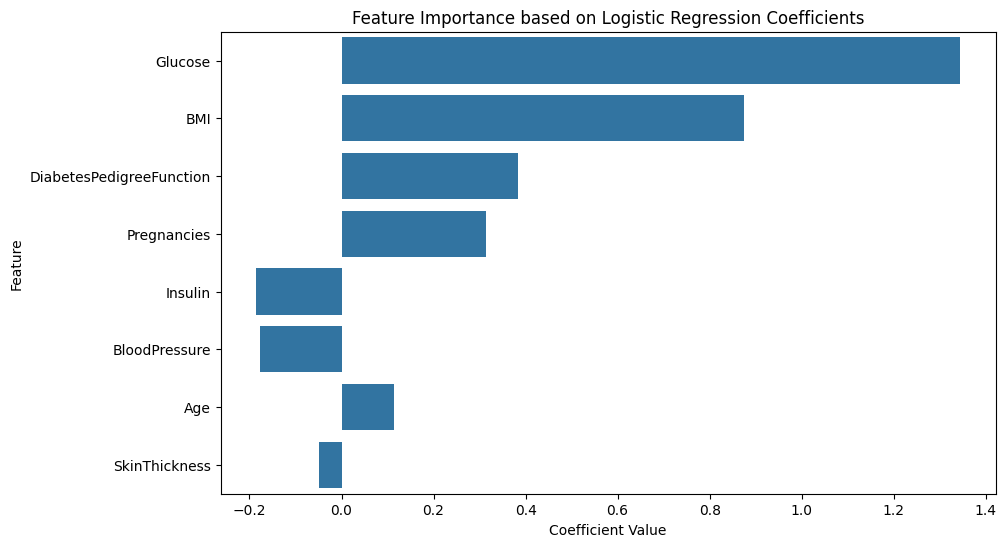


Confusion Matrix:
[[75 25]
 [15 39]]


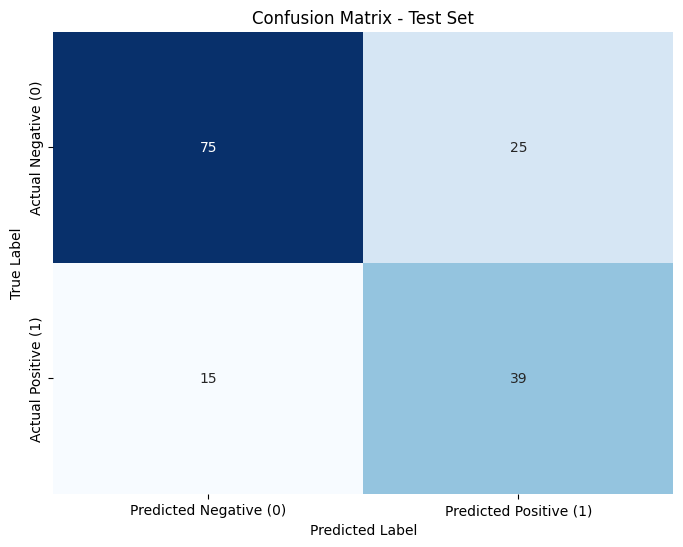


--- Analysis of Errors (False Positives and False Negatives) ---
Number of False Positives (FP): 25
Number of False Negatives (FN): 15

Examples of False Positives (Predicted Positive, Actual Negative):
     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
44             7    159.0           64.0      20.536458   79.799479  27.4   
335            0    165.0           76.0      43.000000  255.000000  47.9   
660           10    162.0           84.0      20.536458   79.799479  27.7   
260            3    191.0           68.0      15.000000  130.000000  30.9   
517            7    125.0           86.0      20.536458   79.799479  37.6   

     DiabetesPedigreeFunction  Age  Outcome  Predicted_Outcome  True_Outcome  
44                      0.294   40        0                  1             0  
335                     0.259   26        0                  1             0  
660                     0.182   54        0                  1             0  
260              

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

coefficients = modelLogisticRegretion.coef_[0]
feature_names = X_train_final.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
feature_importance_df['Absolute_Coefficient'] = abs(coefficients)

feature_importance_df = feature_importance_df.sort_values(by='Absolute_Coefficient', ascending=False)

print("\n--- Feature Importance (Logistic Regression Coefficients) ---")
print(feature_importance_df[['Feature', 'Coefficient']])

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance_df)
plt.title('Feature Importance based on Logistic Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

print("\nConfusion Matrix:")
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative (0)', 'Predicted Positive (1)'],
            yticklabels=['Actual Negative (0)', 'Actual Positive (1)'])
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("\n--- Analysis of Errors (False Positives and False Negatives) ---")

errors_indices = X_test_selected.index[(y_test != y_test_pred)]

false_positives_indices = X_test_selected.index[(y_test == 0) & (y_test_pred == 1)]
false_negatives_indices = X_test_selected.index[(y_test == 1) & (y_test_pred == 0)]

print(f"Number of False Positives (FP): {len(false_positives_indices)}")
print(f"Number of False Negatives (FN): {len(false_negatives_indices)}")

print("\nExamples of False Positives (Predicted Positive, Actual Negative):")
if not false_positives_indices.empty:
    test_data_with_preds = df.loc[X_test_selected.index].copy()
    test_data_with_preds['Predicted_Outcome'] = y_test_pred
    test_data_with_preds['True_Outcome'] = y_test.values
    print(test_data_with_preds.loc[false_positives_indices].head())
else:
    print("No False Positives found.")

print("\nExamples of False Negatives (Predicted Negative, Actual Positive):")
if not false_negatives_indices.empty:
    test_data_with_preds = df.loc[X_test_selected.index].copy()
    test_data_with_preds['Predicted_Outcome'] = y_test_pred
    test_data_with_preds['True_Outcome'] = y_test.values
    print(test_data_with_preds.loc[false_negatives_indices].head())
else:
    print("No False Negatives found.")

**Synthèse de la performance**

Pour nous le model de régression Logistique appliqué aux données de diabète présente des resultats satisfaisant sur l'ensemble de validation.

Les variables les plus influentes identifiées sont:


*   Glucose et Body Mass index (BMI): qui augmentent significativement le rique de diabète
*   Pregnancies et Age: ont un effet plus modéré

L'analyse met en évidence la présence:


*   28 faux positifs
*   18 faux négatif


**Recommandation pour deploiement et collecte de données**


*   Amelioration pour la collectet de données, sur tous pour le glucose et le BMI, qui sont déterminant,
*   Il faut continuer à collecter des données sur les patients diabetiques pour reduire les impact du déséquilibre des classes,

*   Envisager l'utilisation d'un model plus performants et plus robuste (Random Forets, XGBoots) pour améliorer et limiter les faux negatifs,
*   Il faut toujous privilegier les aproches prudente lors du deploiement, que ce model reste toujours un outil complémentaire et non comme diagnostique unique.











